In [8]:
import requests
import pandas as pd
import wbgapi as wb

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for cleaner aesthetics
sns.set(style="whitegrid")

In [5]:
# Function to retrieve GDP data for a specific country and date range
def get_gdp_data(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/NY.GDP.MKTP.CD"
    params = {
        'format': 'json',
        'date': f'{start_year}:{end_year}',
        'per_page': 100,
    }

    response = requests.get(url, params=params)
    data = response.json()[1]  # The data is in the second item of the JSON response

    # Parse the JSON response into a DataFrame
    gdp_data = pd.DataFrame(data)[['date', 'value']]
    gdp_data.columns = ['Year', 'GDP']
    gdp_data['Year'] = pd.to_numeric(gdp_data['Year'])
    gdp_data['GDP'] = pd.to_numeric(gdp_data['GDP'], errors='coerce')  # Convert GDP to numeric

    return gdp_data.sort_values(by='Year')

In [6]:
# Retrieve data for both countries
start_year = 2000
end_year = 2023
china_gdp = get_gdp_data('CHN', start_year, end_year)
us_gdp = get_gdp_data('USA', start_year, end_year)

# Calculate year-over-year growth rate
china_gdp['Growth Rate (%)'] = china_gdp['GDP'].pct_change() * 100
us_gdp['Growth Rate (%)'] = us_gdp['GDP'].pct_change() * 100

# Set display options for better readability
pd.options.display.float_format = '{:,.2f}'.format  # Display GDP in readable format

# Display the full data for both countries with calculated growth rates
print("China GDP Data with Growth Rate")
display(china_gdp)

print("\nUS GDP Data with Growth Rate")
display(us_gdp)

China GDP Data with Growth Rate


,Year,GDP,Growth Rate (%)
23,2000,"1,211,331,651,866.09",NaN
22,2001,"1,339,400,897,105.11",10.57
21,2002,"1,470,557,654,799.95",9.79
20,2003,"1,660,280,543,846.79",12.90
19,2004,"1,955,346,768,721.39",17.77
18,2005,"2,285,961,149,879.85",16.91
17,2006,"2,752,118,657,184.02",20.39
16,2007,"3,550,327,802,998.40",29.00
15,2008,"4,594,336,785,737.67",29.41
14,2009,"5,101,691,124,285.21",11.04



US GDP Data with Growth Rate


,Year,GDP,Growth Rate (%)
23,2000,10250952000000,NaN
22,2001,10581929000000,3.23
21,2002,10929108000000,3.28
20,2003,11456450000000,4.83
19,2004,12217196000000,6.64
18,2005,13039197000000,6.73
17,2006,13815583000000,5.95
16,2007,14474228000000,4.77
15,2008,14769862000000,2.04
14,2009,14478067000000,-1.98


In [12]:
# Save the GDP data for China to a CSV file
china_gdp.to_csv("china_gdp_data.csv", index=False)

# Save the GDP data for the US to a CSV file
us_gdp.to_csv("us_gdp_data.csv", index=False)

print("GDP data for China and US has been saved to 'china_gdp_data.csv' and 'us_gdp_data.csv' respectively!")

GDP data for China and US has been saved to 'china_gdp_data.csv' and 'us_gdp_data.csv' respectively!


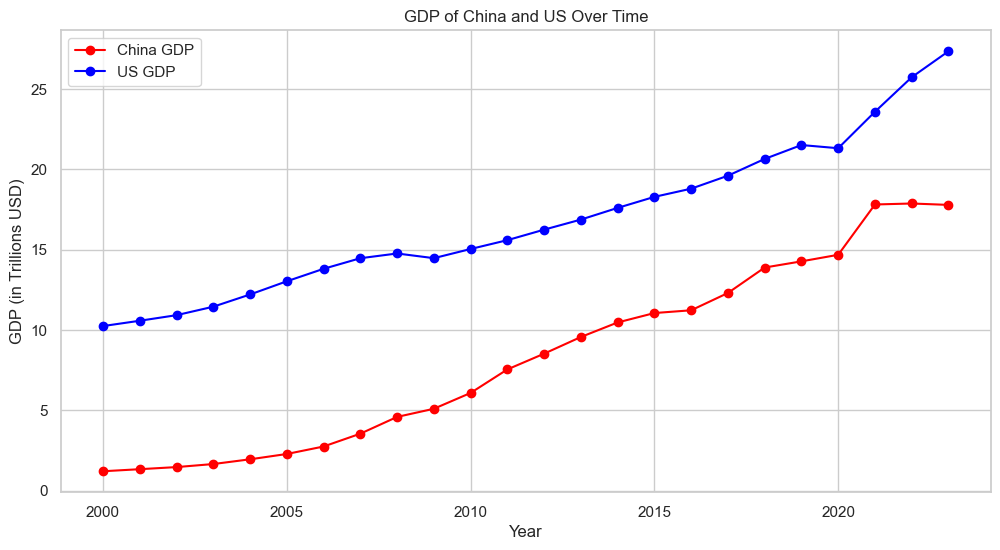

In [14]:
# Plot 1: Line Plot - GDP Over Time (in trillions USD)
plt.figure(figsize=(12, 6))
plt.plot(china_gdp['Year'], china_gdp['GDP'] / 1e12, label="China GDP", marker='o', color='red')
plt.plot(us_gdp['Year'], us_gdp['GDP'] / 1e12, label="US GDP", marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('GDP (in Trillions USD)')
plt.title('GDP of China and US Over Time')
plt.legend()
plt.savefig("gdp_over_time.png", dpi=300)  # Save plot as PNG
plt.show()

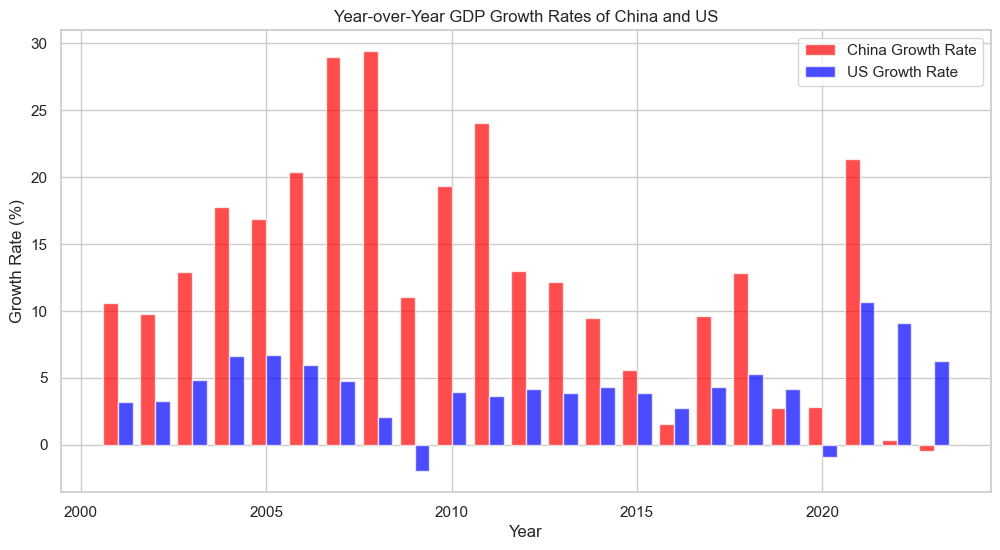

In [15]:
# Plot 2: Bar Plot - Year-over-Year Growth Rates
plt.figure(figsize=(12, 6))
width = 0.4  # Width of the bars
plt.bar(china_gdp['Year'] - width/2, china_gdp['Growth Rate (%)'], width=width, label="China Growth Rate", color='red', alpha=0.7)
plt.bar(us_gdp['Year'] + width/2, us_gdp['Growth Rate (%)'], width=width, label="US Growth Rate", color='blue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Year-over-Year GDP Growth Rates of China and US')
plt.legend()
plt.savefig("gdp_growth_rates.png", dpi=300)  # Save plot as PNG
plt.show()

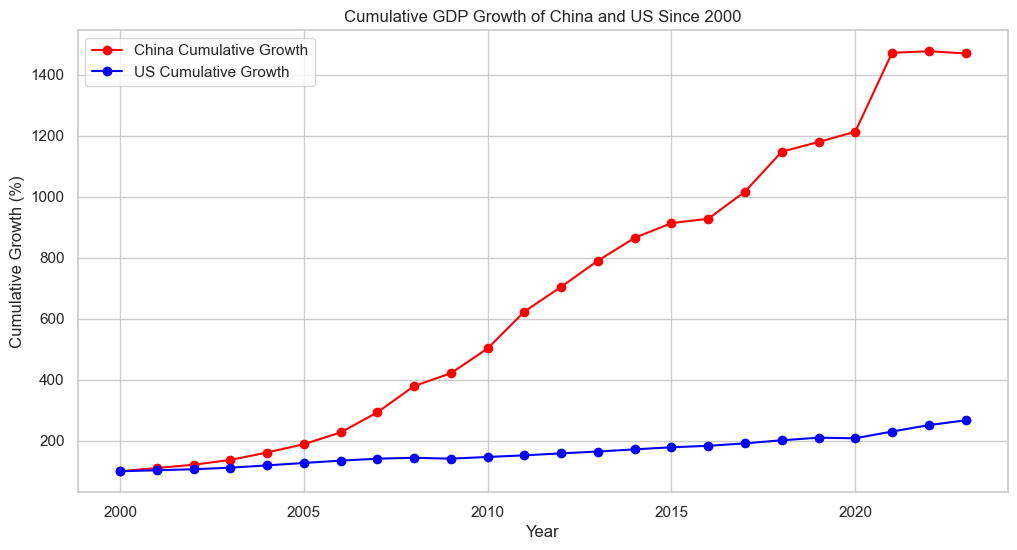

In [16]:
# Plot 3: Cumulative GDP Growth Comparison (Base Year)
# Calculate cumulative growth as a percentage relative to the first year
china_gdp['Cumulative Growth (%)'] = (china_gdp['GDP'] / china_gdp['GDP'].iloc[0]) * 100
us_gdp['Cumulative Growth (%)'] = (us_gdp['GDP'] / us_gdp['GDP'].iloc[0]) * 100

plt.figure(figsize=(12, 6))
plt.plot(china_gdp['Year'], china_gdp['Cumulative Growth (%)'], label="China Cumulative Growth", marker='o', color='red')
plt.plot(us_gdp['Year'], us_gdp['Cumulative Growth (%)'], label="US Cumulative Growth", marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Cumulative Growth (%)')
plt.title('Cumulative GDP Growth of China and US Since 2000')
plt.legend()
plt.savefig("cumulative_gdp_growth.png", dpi=300)  # Save plot as PNG
plt.show()